In [1]:
import glob
import loader
import seaborn as sns
import numpy as np
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

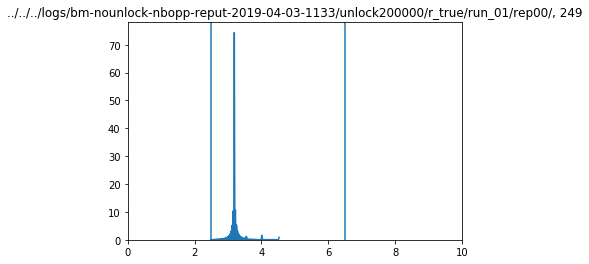

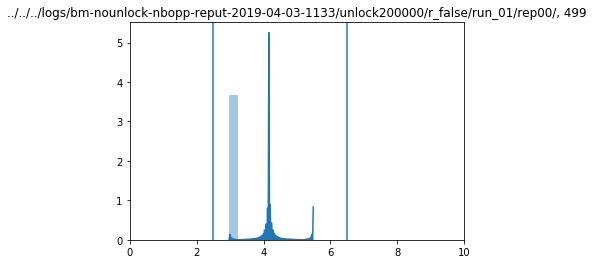

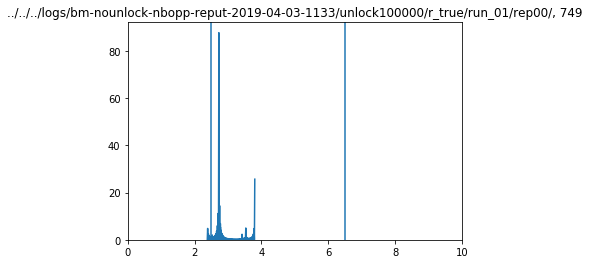

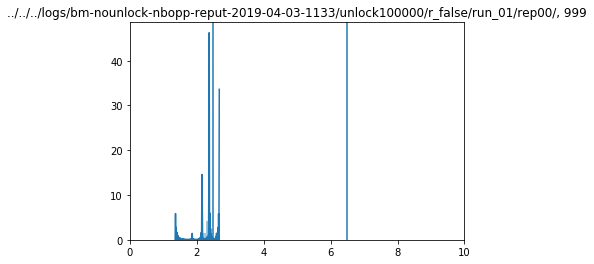

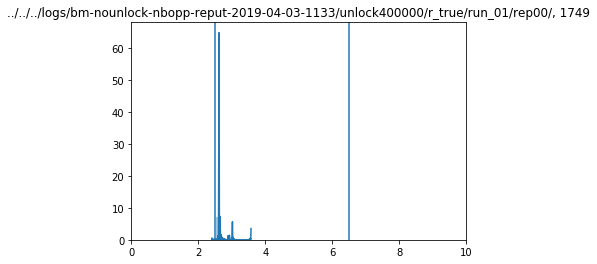

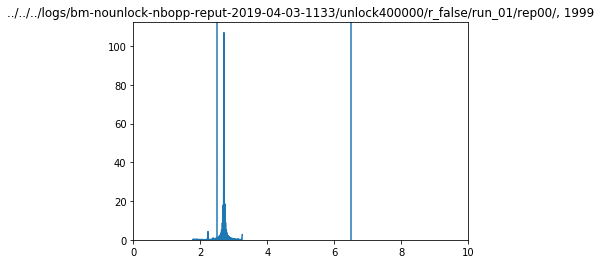

In [4]:
val = '../../../logs/bm-nounlock-nbopp-reput-2019-04-03-1133/*/*/*/rep00/'
vals = glob.glob(val, recursive=True)
for gen, name, generation in zip(loader.getgenomes(vals), vals, loader.getlastgen(vals)):
    fig = plt.figure()
    sns.distplot(gen)
    plt.xlim(0, 10)
    plt.axvline(2.5)
    plt.axvline(6.5)
    plt.title(name + ', ' + str(generation))
    plt.show(fig)
    plt.close(fig)

In [17]:
for fit in loader.getfitness([val]):
    sns.lineplot(x='gen', y='fitness', data=fit, ci=None)
    plt.ylim(0, None)
    

erreur, pas de run


,gen,ind,rep,fake,fitness
0,0,0,6,4.695913,-0.034114
1,0,1,6,3.515242,0.026920
2,0,2,6,3.942917,0.143150
3,0,3,6,4.637663,0.036218
4,0,4,6,4.577060,0.154994
5,0,5,6,4.313591,0.119785
6,0,6,6,3.355420,0.155811
7,0,7,6,4.066840,0.250071
8,0,8,6,4.225552,-0.364151
9,0,9,6,4.423885,0.039685
